In [54]:
# Imports etc.
import torch
from torch.nn.functional import interpolate
import matplotlib
import matplotlib.pyplot as plt

from src.utils.kpt_utils import kpts_2_img_coordinates

In [55]:
sample = torch.load('/home/yannik/vssil/eval/ulosd_simitate_stack_128pix/ulosd_sample_3/sample.pt')
print(sample.shape)

torch.Size([1, 30, 3, 128, 128])


In [56]:
kpts = torch.load('/home/yannik/vssil/eval/ulosd_simitate_stack_128pix/ulosd_sample_3/key_points.pt')
kpts[..., :2] *= -1
img_coordinates = kpts_2_img_coordinates(kpts, sample.shape[-2:])
print(kpts.shape)

torch.Size([1, 30, 48, 3])


In [57]:
gmaps = torch.load('/home/yannik/vssil/eval/ulosd_simitate_stack_128pix/ulosd_sample_3/gmaps.pt')
print(gmaps.shape)

torch.Size([1, 30, 48, 32, 32])


In [58]:
upsampled_gmap = interpolate(gmaps[0:1, 0:1, 2], sample.shape[-2:])
print(upsampled_gmap.shape)

torch.Size([1, 1, 128, 128])


In [59]:
mask = torch.zeros_like(upsampled_gmap)
threshold = 0.01
ids = torch.where(upsampled_gmap > threshold)
mask[ids] = 1
print(mask.shape)

torch.Size([1, 1, 128, 128])


In [60]:
masked_image = torch.clone(sample[0, 0]) * mask
print(masked_image.shape)

torch.Size([1, 3, 128, 128])


In [65]:
font = {'family' : 'Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

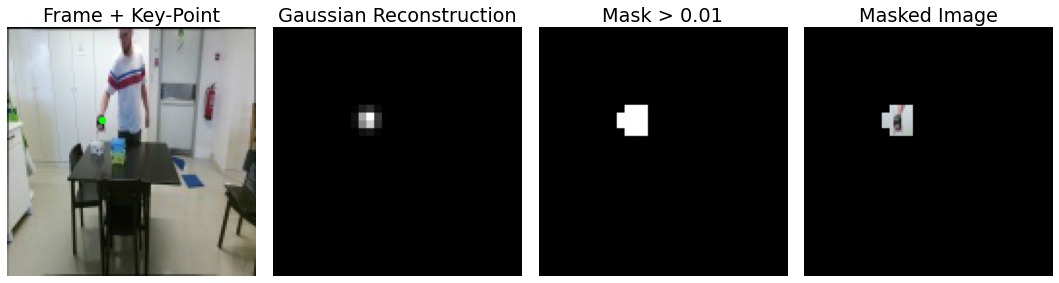

In [66]:
# for k in range(kpts.shape[2]):
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].set_title('Frame + Key-Point')
ax[0].axis('off')
ax[0].imshow(sample[0, 0].permute(1 ,2 ,0))
ax[0].scatter(img_coordinates[0, 0, 2, 0], img_coordinates[0, 0, 2, 1], color='lime')

ax[1].set_title('Gaussian Reconstruction')
ax[1].axis('off')
ax[1].imshow(upsampled_gmap[0, 0], cmap='gray')

ax[2].set_title(f'Mask > {threshold}')
ax[2].axis('off')
ax[2].imshow(mask[0, 0], cmap='gray')

ax[3].set_title(f'Masked Image')
ax[3].axis('off')
ax[3].imshow(masked_image[0].permute(1, 2, 0))

# plt.show()
plt.tight_layout()
fig.savefig('/home/yannik/gmap_mask.svg', bbox_inches='tight')
    